Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitize and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [70]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS 

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [34]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv("movies.csv")
 

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [35]:
# code here

removed_columns = ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title', 'title']

movies_df.drop(removed_columns, axis = 1, inplace = True)

# display shape to show that the dataset has been modified
movies_df.head(9)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,115.699814,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.4,5293


#### Remove any duplicate rows

In [36]:
# code here
movies_df.drop_duplicates(inplace=True)
# Check if done (-1 entry)
movies_df.info()
# display(movies_df.shape)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   popularity            4803 non-null   float64
 4   production_countries  4803 non-null   object 
 5   release_date          4802 non-null   object 
 6   revenue               4803 non-null   int64  
 7   runtime               4801 non-null   float64
 8   spoken_languages      4803 non-null   object 
 9   vote_average          4803 non-null   float64
 10  vote_count            4803 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 450.3+ KB


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [37]:
# Code here
listesr = ['budget', 'revenue']

for i in listesr:
    movies_df.drop(movies_df[movies_df[i] == 0].index, inplace = True)
    

# Print the modified dataframe
print(movies_df.head())

# Print the shape of the dataframe 
print(movies_df.shape) 

      budget                                             genres      id  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   19995   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...     285   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...  206647   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   49026   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   49529   

   popularity                               production_countries release_date  \
0  150.437577  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
1  139.082615  [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
2  107.376788  [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
3  112.312950  [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
4   43.926995  [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

      revenue  runtime                                   spoke

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [38]:
# Change the release_date column to DateTime column

movies_df['release_date'].head()

# create a new column, date_parsed, with the parsed dates


movies_df['DateTime'] = pd.to_datetime(movies_df['release_date'], format='%Y-%m-%d')

print("New date format")
print(movies_df['DateTime'].head())


# Extract the release year from every release date

print("\nYear:")
movies_df.DateTime.dt.year.head()


New date format
0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: DateTime, dtype: datetime64[ns]

Year:


0    2009
1    2007
2    2015
3    2012
4    2012
Name: DateTime, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [39]:
# code here

budge_revenue_list = ['budget', 'revenue']

for x in budge_revenue_list :
    movies_df[x].astype('int64').dtypes


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [41]:
# movies_df = pd.read_csv("movies.csv")
movies_df.columns

Index(['budget', 'genres', 'id', 'popularity', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages',
       'vote_average', 'vote_count', 'DateTime'],
      dtype='object')

In [42]:

def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1 = []
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
# parse_col_json('spoken_languages', 'name')
# parse_col_json('cast', 'name')
# parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",7.2,11800,2009-12-10
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.9,4500,2007-05-19
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",6.3,4466,2015-10-26
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",7.6,9106,2012-07-16
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",6.1,2124,2012-03-07


In [43]:
parse_col_json('spoken_languages', 'name')
movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009-12-10
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,['English'],6.9,4500,2007-05-19
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",6.3,4466,2015-10-26
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,['English'],7.6,9106,2012-07-16
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,['English'],6.1,2124,2012-03-07


In [44]:

parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009-12-10
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],6.9,4500,2007-05-19
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",6.3,4466,2015-10-26
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],7.6,9106,2012-07-16
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],6.1,2124,2012-03-07


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [46]:
# Code here
# Which are the 5 most expensive movies? 
#use budget to determine which movies are expensive
# and function called nlargest to determine the expensive movies in descending order.
display(movies_df.nlargest(5, ['budget']))


# How do the most expensive and cheapest movies compare?
display(movies_df.nsmallest(5, ['budget']))

# Analysing the data one can movie genre determines the budget of a movie. Most expensive movies fall under the adventure and action  genres. while the 
# Cheapest movies fall under drama, fantasy, comedy and thriller.
# the more the expensive the movie the more the potential for large revenue due to advertisement and quality of production.


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",6.4,4948,2011-05-14
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],6.9,4500,2007-05-19
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],7.3,6767,2015-04-22
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",5.4,1400,2006-06-28
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],6.1,2124,2012-03-07


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],8.1,856,1936-02-05
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],6.2,28,1932-12-08
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],5.7,63,1992-05-01
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],5.2,6,2009-08-09
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],6.4,138,1995-09-01


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [47]:
# code here
# What are the top 5 most profitable movies?



# movies_df['profit'] = movies_df['revenue'].sub(movies_df['budget'], axis = 0)
movies_df ['profit'] = movies_df['revenue'] - movies_df['budget']


display(movies_df.nlargest(5, ['profit']))

display(movies_df.nsmallest(5, ['profit']))





,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",7.2,11800,2009-12-10,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",7.5,7562,1997-11-18,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],6.5,8662,2015-06-09,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],7.3,4176,2015-04-01,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],7.4,11776,2012-04-25,1299557910


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime,profit
13,255000000,"['Action', 'Adventure', 'Western']",57201,49.046956,['United States of America'],2013-07-03,89289910,149.0,['English'],5.9,2311,2013-07-03,-165710090
338,145000000,"['Western', 'History', 'War']",10733,10.660441,['United States of America'],2004-04-07,25819961,137.0,"['English', 'Español']",5.8,106,2004-04-07,-119180039
141,150000000,"['Adventure', 'Animation', 'Family']",50321,12.362599,['United States of America'],2011-03-09,38992758,88.0,['English'],5.5,199,2011-03-09,-111007242
208,160000000,"['Adventure', 'Fantasy', 'Action']",1911,27.220157,['United States of America'],1999-08-27,61698899,102.0,"['English', 'Norsk']",6.4,510,1999-08-27,-98301101
311,100000000,"['Action', 'Comedy', 'Science Fiction']",11692,12.092241,"['Australia', 'United States of America']",2002-08-15,7103973,95.0,['English'],4.4,142,2002-08-15,-92896027


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [48]:
# Code here

# Find the most talked about movies. Sort the dataframe based on the popularity column.
movies_df = movies_df.sort_values(by = 'popularity', ascending = False)
display(movies_df)


# Find Movies which are rated above 7
rated_above_7 = movies_df[movies_df['vote_average'] > 7]
display(rated_above_7)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],6.4,4571,2015-06-17,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],8.1,10867,2014-11-05,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],7.4,10995,2016-02-09,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],7.9,9742,2014-07-30,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],7.2,9427,2015-05-13,228858340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,2100000,"['Drama', 'Crime']",364083,0.039007,['United States of America'],2015-10-16,3330,126.0,"['Español', 'English']",0.0,0,2015-10-16,-2096670
2970,10500000,"['Drama', 'Comedy']",88641,0.037073,['United States of America'],1994-09-02,123509,99.0,['English'],8.5,2,1994-09-02,-10376491
3225,8000000,"['Adventure', 'Drama', 'Thriller']",62676,0.034259,[],1999-06-04,1997807,126.0,['English'],7.0,17,1999-06-04,-6002193
4105,2000000,[],48382,0.031947,[],2003-09-12,1672730,120.0,[],5.0,2,2003-09-12,-327270


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime,profit
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],8.1,10867,2014-11-05,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],7.4,10995,2016-02-09,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],7.9,9742,2014-07-30,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],7.2,9427,2015-05-13,228858340
199,140000000,"['Adventure', 'Fantasy', 'Action']",22,271.972889,['United States of America'],2003-07-09,655011224,143.0,['English'],7.5,6985,2003-07-09,515011224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1000000,"['Crime', 'Drama', 'Mystery', 'Thriller']",26791,0.280083,['United States of America'],2001-03-30,852206,119.0,['English'],7.3,4,2001-03-30,-147794
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],7.4,63,1997-11-06,79000
3875,2000000,"['Romance', 'Drama']",108346,0.116150,"['United Kingdom', 'United States of America']",1999-10-29,7,92.0,['English'],8.0,1,1999-10-29,-1999993
3471,6000000,['Documentary'],57612,0.041651,"['Bahamas', 'United Kingdom']",2008-02-15,7518876,42.0,['English'],8.0,3,2008-02-15,1518876


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [49]:
# Code here
display("Ten movies with most profitable by years ")
display(movies_df.sort_values('popularity').head())

display("\nTen movies with least profitable by years ")
display(movies_df.sort_values('popularity').tail())

'Ten movies with most profitable by years '

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime,profit
3921,3000000,['Drama'],44634,0.019984,['United States of America'],2004-09-30,6804016,94.0,['English'],5.0,3,2004-09-30,3804016
4105,2000000,[],48382,0.031947,[],2003-09-12,1672730,120.0,[],5.0,2,2003-09-12,-327270
3225,8000000,"['Adventure', 'Drama', 'Thriller']",62676,0.034259,[],1999-06-04,1997807,126.0,['English'],7.0,17,1999-06-04,-6002193
2970,10500000,"['Drama', 'Comedy']",88641,0.037073,['United States of America'],1994-09-02,123509,99.0,['English'],8.5,2,1994-09-02,-10376491
4065,2100000,"['Drama', 'Crime']",364083,0.039007,['United States of America'],2015-10-16,3330,126.0,"['Español', 'English']",0.0,0,2015-10-16,-2096670


'\nTen movies with least profitable by years '

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,DateTime,profit
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],7.2,9427,2015-05-13,228858340
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],7.9,9742,2014-07-30,603328629
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],7.4,10995,2016-02-09,725112979
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],8.1,10867,2014-11-05,510120017
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],6.4,4571,2015-06-17,1082730962


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

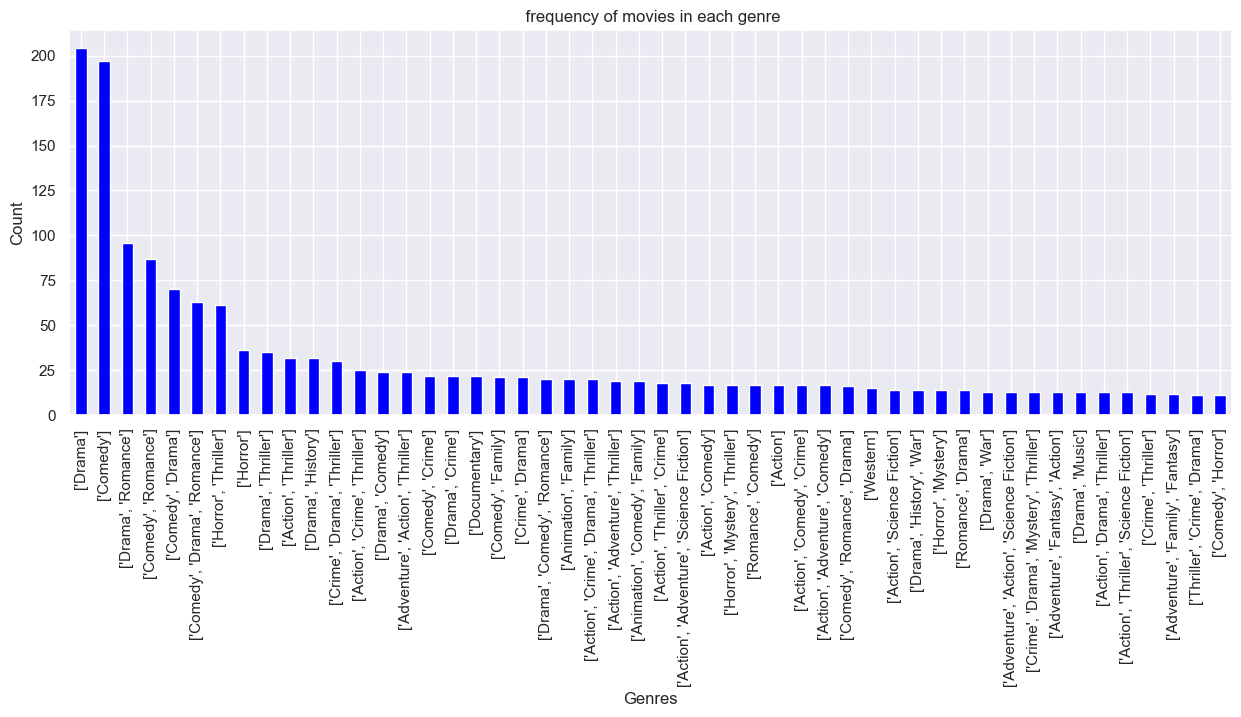

In [54]:
 # Code here

movies_df.genres.unique()


plt.style.use('default')
sns.set(style = 'darkgrid')
# Top 50 most popular genres in movies dataset
movies_df.genres.value_counts().nlargest(50).plot(kind='bar', color = 'blue', figsize=(15,5))

plt.title(" frequency of movies in each genre")
plt.ylabel('Count')
plt.xlabel('Genres')
plt.show()
# Drama is the most popular genre followed by comedy and drama-romance genres 

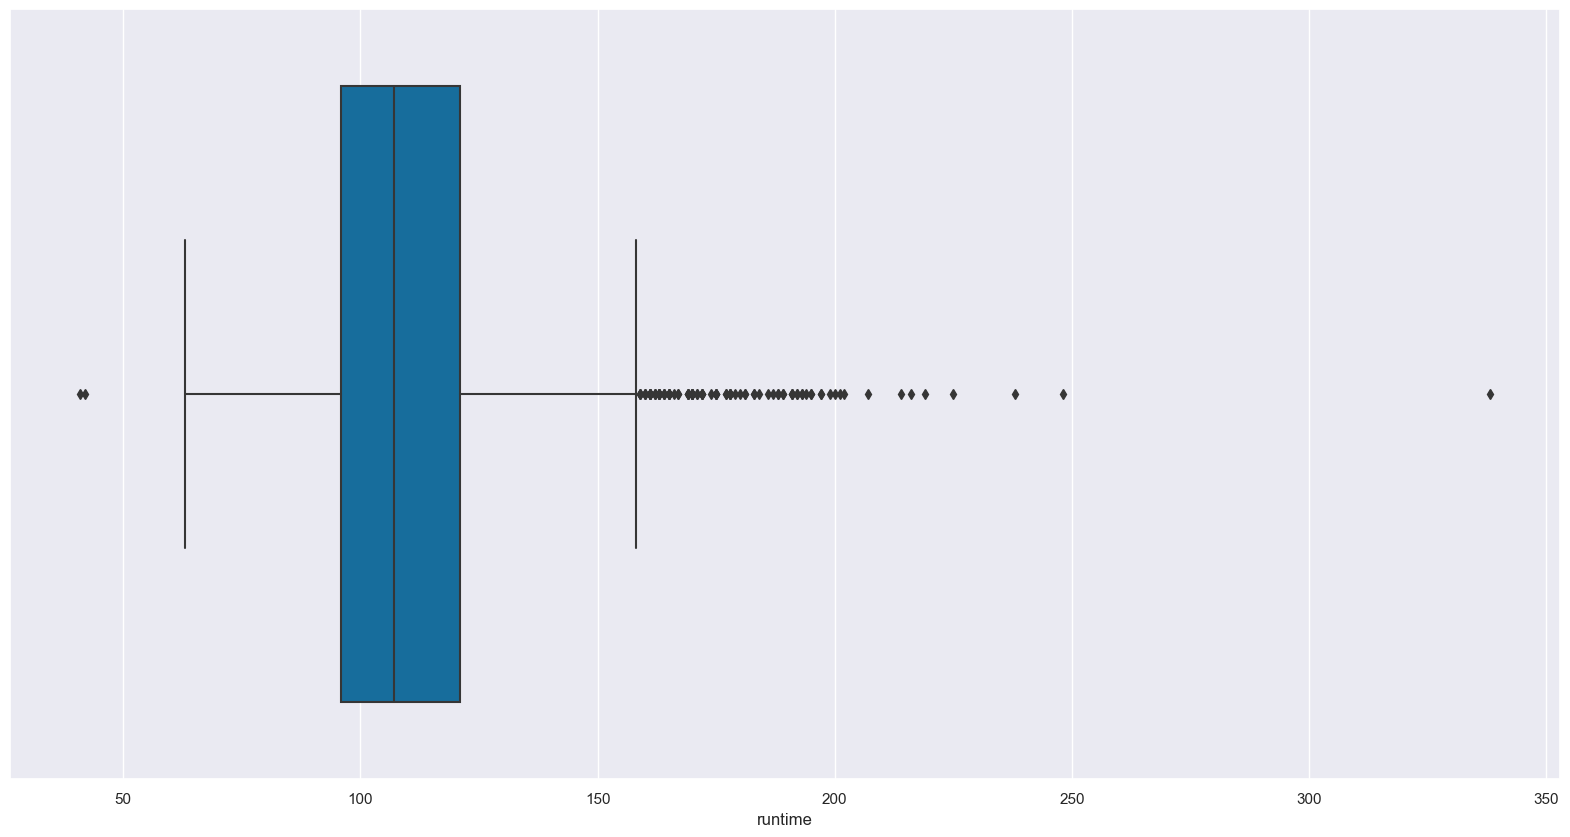

(3229, 13)

In [73]:
#### Generate three different interesting visualizations with a data story.

plt.style.use('default')
sns.set(style = 'darkgrid')
plt.figure(figsize=(20,10))
sns.boxplot(x = movies_df['runtime'],palette = 'colorblind')
plt.show()
display(movies_df.shape)
# average runtime of movies in dataset is approximately 105 minutes

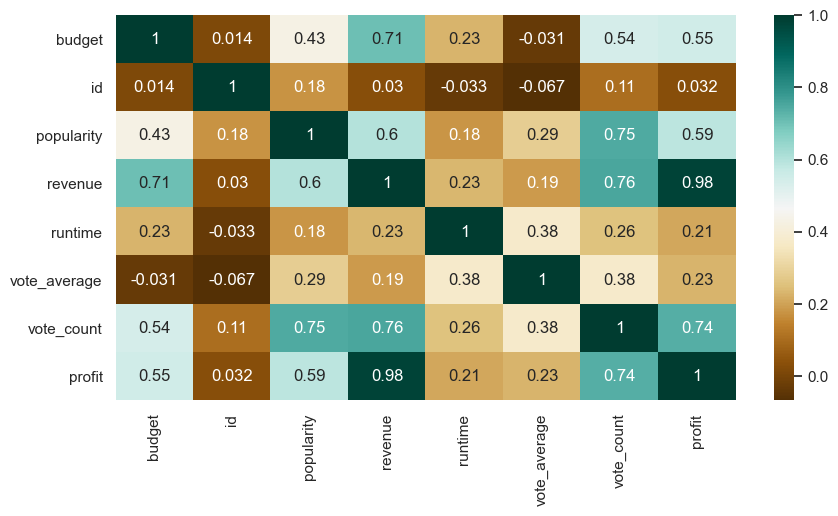

In [56]:
# Plotting a heat map
plt.figure(figsize=(10,5))
c= movies_df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
plt.show()

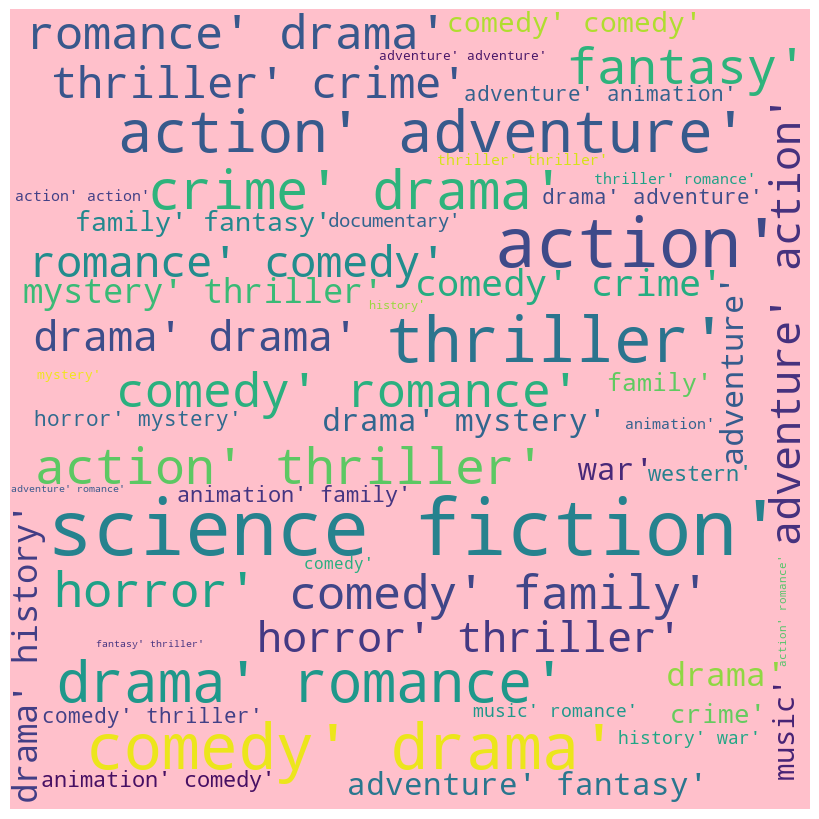

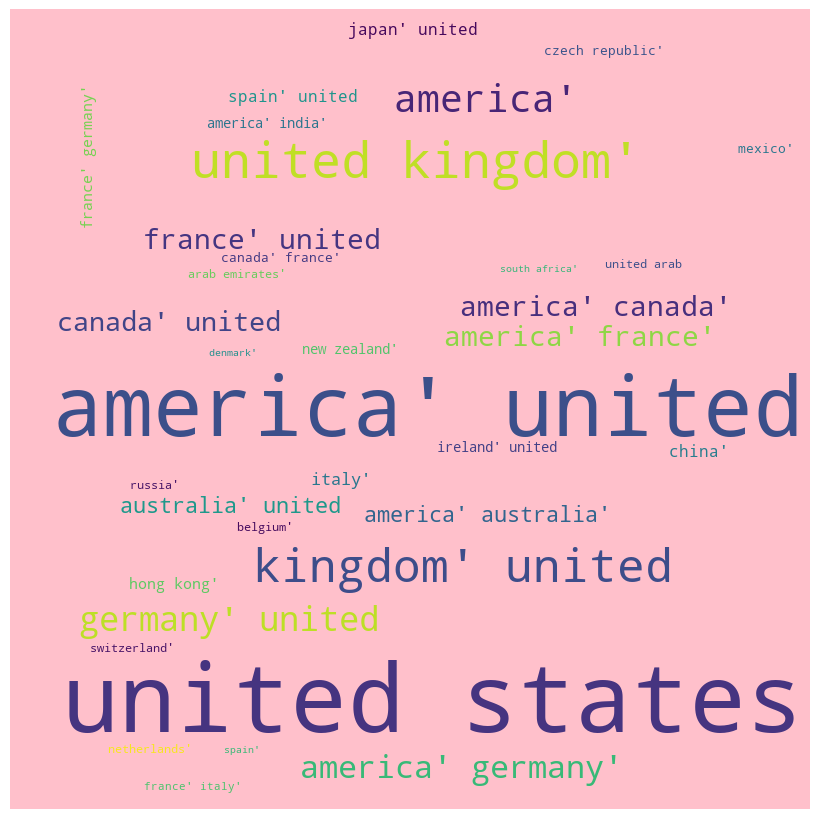

In [72]:
plt.style.use('default')
sns.set(style = 'whitegrid')

text = ['genres', 'production_countries']

for i in text:
    
    comment_words = ''
    stopwords = set(STOPWORDS)
    
    # iterate through the csv file
    for val in movies_df[i]:
        # typecaste each val to string
        val = str(val)
        
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens)+" "
            
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='pink',
                          stopwords = stopwords,
                          min_font_size = 10).generate(comment_words)
    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud,  interpolation = "bilinear")
    plt.axis("off") 
    plt.tight_layout(pad = 0)
    plt.show() 

plt.show() 

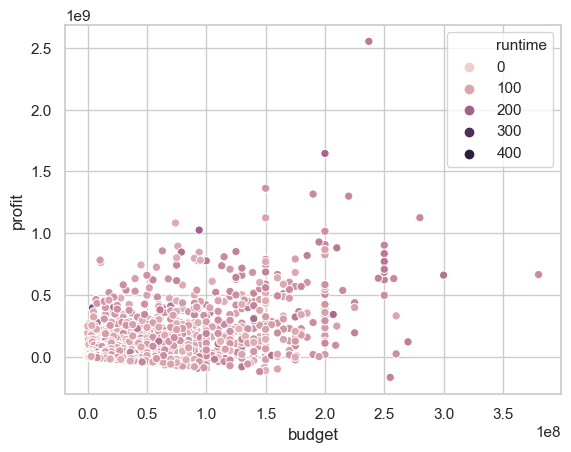

In [67]:
sns.set(style='whitegrid')
# fmri = seaborn.load_dataset("fmri")
 
sns.scatterplot(x = "budget", y = "profit", hue = "runtime", data = movies_df)

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualizations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)